In [1]:
# Importing librarys
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# creating augmentation on training variables
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True)

In [3]:
# creating a augmentaion on testu=ing variables
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
xtrain = train_datagen.flow_from_directory(r'C:\Users\prasa\OneDrive\Desktop\nalaiyathiran\Flowers-Dataset\training_set', target_size=(64, 64), class_mode='categorical',batch_size=100)

Found 4317 images belonging to 5 classes.


In [5]:
xtest = test_datagen.flow_from_directory(r'C:\Users\prasa\OneDrive\Desktop\nalaiyathiran\Flowers-Dataset\test_set', target_size=(64, 64), class_mode='categorical', batch_size=100)

Found 3615 images belonging to 5 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [7]:
#CNN Block
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) #convolution Layer
model.add(MaxPooling2D(pool_size=(2,2))) #Max Pooling layer
model.add(Flatten()) #Flatten Layer

#Fully Connected Layer(ANN)
model.add(Dense(700,activation='relu')) #Hidden Layer 1
model.add(Dense(550,activation='relu')) #Hidden Layer 2
model.add(Dense(5,activation='softmax')) #Output Layer

In [8]:
#Compile the Model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
# Train model

model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=10,
                    validation_data=xtest,
                    validation_steps=len(xtest))

C:\Users\prasa\AppData\Local\Temp\ipykernel_9424\3464147896.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(xtrain,


Epoch 1/10
44/44 [==============================] - 37s 827ms/step - loss: 1.7130 - accuracy: 0.3533 - val_loss: 1.2387 - val_accuracy: 0.4899
Epoch 2/10
44/44 [==============================] - 31s 710ms/step - loss: 1.0966 - accuracy: 0.5552 - val_loss: 1.2315 - val_accuracy: 0.5402
Epoch 3/10
44/44 [==============================] - 30s 694ms/step - loss: 0.9923 - accuracy: 0.6083 - val_loss: 1.0185 - val_accuracy: 0.6260
Epoch 4/10
44/44 [==============================] - 30s 693ms/step - loss: 0.9184 - accuracy: 0.6486 - val_loss: 0.8907 - val_accuracy: 0.6539
Epoch 5/10
44/44 [==============================] - 30s 691ms/step - loss: 0.8622 - accuracy: 0.6657 - val_loss: 0.7891 - val_accuracy: 0.7001
Epoch 6/10
44/44 [==============================] - 30s 693ms/step - loss: 0.7855 - accuracy: 0.6996 - val_loss: 0.8144 - val_accuracy: 0.6893
Epoch 7/10
44/44 [==============================] - 30s 694ms/step - loss: 0.7641 - accuracy: 0.7077 - val_loss: 0.7457 - val_accuracy: 0.7189

In [33]:
# Saving the model
model.save('Flower.h5')

## Testing Model

In [24]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [119]:
img = image.load_img(r'C:/Users/prasa/OneDrive/Desktop/nalaiyathiran/Flowers-Dataset/test_set/rose/3705716290_cb7d803130_n.jpg',
                    target_size=(64,64))

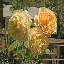

In [120]:
img

In [121]:
# Converting image to array

x = image.img_to_array(img)
x

array([[[ 58.,  55.,  36.],
        [ 34.,  31.,  14.],
        [ 44.,  42.,  29.],
        ...,
        [ 91., 101.,  49.],
        [ 88.,  88.,  50.],
        [ 70.,  78.,  39.]],

       [[ 48.,  46.,  31.],
        [ 31.,  30.,  12.],
        [ 38.,  38.,  26.],
        ...,
        [ 98., 108.,  55.],
        [ 68.,  76.,  39.],
        [ 69.,  68.,  37.]],

       [[ 50.,  47.,  30.],
        [ 44.,  41.,  22.],
        [ 57.,  56.,  38.],
        ...,
        [ 56.,  70.,  34.],
        [ 74.,  82.,  43.],
        [ 77.,  83.,  35.]],

       ...,

       [[ 73.,  69.,  31.],
        [ 40.,  42.,  21.],
        [ 32.,  33.,  19.],
        ...,
        [ 35.,  33.,  20.],
        [ 35.,  33.,  21.],
        [ 30.,  31.,  17.]],

       [[ 79.,  74.,  52.],
        [ 38.,  42.,  17.],
        [117., 143.,  80.],
        ...,
        [ 33.,  34.,  20.],
        [ 33.,  34.,  16.],
        [ 27.,  26.,  21.]],

       [[ 82.,  78.,  53.],
        [ 36.,  40.,  17.],
        [118., 1

In [122]:
# Expanding dimensions

x = np.expand_dims(x, axis=0)
x

array([[[[ 58.,  55.,  36.],
         [ 34.,  31.,  14.],
         [ 44.,  42.,  29.],
         ...,
         [ 91., 101.,  49.],
         [ 88.,  88.,  50.],
         [ 70.,  78.,  39.]],

        [[ 48.,  46.,  31.],
         [ 31.,  30.,  12.],
         [ 38.,  38.,  26.],
         ...,
         [ 98., 108.,  55.],
         [ 68.,  76.,  39.],
         [ 69.,  68.,  37.]],

        [[ 50.,  47.,  30.],
         [ 44.,  41.,  22.],
         [ 57.,  56.,  38.],
         ...,
         [ 56.,  70.,  34.],
         [ 74.,  82.,  43.],
         [ 77.,  83.,  35.]],

        ...,

        [[ 73.,  69.,  31.],
         [ 40.,  42.,  21.],
         [ 32.,  33.,  19.],
         ...,
         [ 35.,  33.,  20.],
         [ 35.,  33.,  21.],
         [ 30.,  31.,  17.]],

        [[ 79.,  74.,  52.],
         [ 38.,  42.,  17.],
         [117., 143.,  80.],
         ...,
         [ 33.,  34.,  20.],
         [ 33.,  34.,  16.],
         [ 27.,  26.,  21.]],

        [[ 82.,  78.,  53.],
       

In [123]:

# Predicting Flower

model.predict(x)

1/1 [==============================] - 0s 48ms/step


array([[1.5428707e-04, 1.3498879e-19, 9.7169286e-01, 2.8152790e-02,
        0.0000000e+00]], dtype=float32)

In [124]:
# For visualizing class index

xtrain.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [126]:
# Predicting and Index Matching

op = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
pred = np.argmax(model.predict(x))
op[pred]

1/1 [==============================] - 0s 44ms/step


'rose'